In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data
data = pd.read_csv("../startup data.csv")

#### Objective

The objective is to predict whether a startup which is currently operating turns into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shut down.

#### About the Data

The data contains industry trends, investment insights and individual company information. There are 48 columns/features. Some of the features are:

* agefirstfunding_year – quantitative
* agelastfunding_year – quantitative
* relationships – quantitative
* funding_rounds – quantitative
* fundingtotalusd – quantitative
* milestones – quantitative
* agefirstmilestone_year – quantitative
* agelastmilestone_year – quantitative
* state – categorical
* industry_type – categorical
* has_VC – categorical
* has_angel – categorical
* has_roundA – categorical
* has_roundB – categorical
* has_roundC – categorical
* has_roundD – categorical
* avg_participants – quantitative
* is_top500 – categorical

* **status(acquired/closed) – categorical (the target variable, if a startup is ‘acquired’ by some other organization, means the startup succeed)** 

In [3]:
data.head(10)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,...,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,...,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,...,c:5192,0,0,1,1,0,1,3.5000,1,acquired
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,...,c:1043,1,0,1,0,0,1,4.0000,1,acquired
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,...,c:498,1,1,1,0,0,0,1.0000,1,acquired


In [4]:
data.tail()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired
922,462,CA,37.386778,-121.966277,95054,c:26702,Santa Clara,Santa Clara CA 95054,Asempra Technologies,1,...,c:26702,0,0,0,1,0,0,3.0000,1,acquired


In [5]:
data.duplicated().any()

False

In [6]:
data.shape

(923, 49)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [8]:
data.isna().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,923.0,5.722979e+02,3.335854e+02,1.000000,2.835000e+02,5.770000e+02,8.665000e+02,1.153000e+03
latitude,923.0,3.851744e+01,3.741497e+00,25.752358,3.738887e+01,3.777928e+01,4.073065e+01,5.933523e+01
longitude,923.0,-1.035392e+02,2.239417e+01,-122.756956,-1.221987e+02,-1.183740e+02,-7.721473e+01,1.805712e+01
labels,923.0,6.468039e-01,4.782221e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
age_first_funding_year,923.0,2.235630e+00,2.510449e+00,-9.046600,5.767000e-01,1.446600e+00,3.575350e+00,2.189590e+01
age_last_funding_year,923.0,3.931456e+00,2.967910e+00,-9.046600,1.669850e+00,3.528800e+00,5.560250e+00,2.189590e+01
age_first_milestone_year,771.0,3.055353e+00,2.977057e+00,-14.169900,1.000000e+00,2.520500e+00,4.686300e+00,2.468490e+01
age_last_milestone_year,771.0,4.754423e+00,3.212107e+00,-7.005500,2.411000e+00,4.476700e+00,6.753400e+00,2.468490e+01
relationships,923.0,7.710726e+00,7.265776e+00,0.000000,3.000000e+00,5.000000e+00,1.000000e+01,6.300000e+01
funding_rounds,923.0,2.310943e+00,1.390922e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01


In [10]:
data.describe(include=[np.object]).T

,count,unique,top,freq
state_code,923,35,CA,488
zip_code,923,382,94107,30
id,923,922,c:28482,2
city,923,221,San Francisco,128
Unnamed: 6,430,252,San Francisco CA 94105,12
name,923,922,Redwood Systems,2
founded_at,923,217,1/1/2003,55
closed_at,335,202,6/1/2013,25
first_funding_at,923,585,1/1/2008,18
last_funding_at,923,680,1/1/2008,11


In [11]:
startup = data.drop(["Unnamed: 0", "Unnamed: 6"], axis=1)

In [12]:
startup.shape

(923, 47)

In [13]:
col_list = startup.columns.to_list()

In [14]:
for column in col_list:
    if len(startup[column].unique()) < 60 and len(startup[column].unique()) > 2:
        print(f"{column}:", len(startup[column].unique()))

state_code: 35
relationships: 41
funding_rounds: 9
milestones: 8
state_code.1: 36
category_code: 35
avg_participants: 59


In [15]:
for column in col_list:
    if len(startup[column].unique()) == 2:
        print(f"{column}:", len(startup[column].unique()))

labels: 2
is_CA: 2
is_NY: 2
is_MA: 2
is_TX: 2
is_otherstate: 2
is_software: 2
is_web: 2
is_mobile: 2
is_enterprise: 2
is_advertising: 2
is_gamesvideo: 2
is_ecommerce: 2
is_biotech: 2
is_consulting: 2
is_othercategory: 2
has_VC: 2
has_angel: 2
has_roundA: 2
has_roundB: 2
has_roundC: 2
has_roundD: 2
is_top500: 2
status: 2


### Cleaning up zip code

In [16]:
startup["zip_code"].sample(10)

112    95035-6261
703          2452
551         94025
644         94040
914         10001
312         94107
614         94103
543         94304
188         95128
52          78731
Name: zip_code, dtype: object

In [17]:
startup["zip_code"].isna().sum()

0

In [18]:
regex = r"^(\d{5})"

In [19]:
extr = startup["zip_code"].str.extract(regex, expand=False)
extr.sample(10)

628    10013
26     94303
425    94404
615    95014
893    10012
795    10014
225    98104
64     02111
513    10010
313    94104
Name: zip_code, dtype: object

In [20]:
extr.isna().sum()

101

In [21]:
common = extr.mode()[0]
extr = extr.fillna(common)
extr.isna().sum()

0

In [22]:
startup["zip_code"] = extr

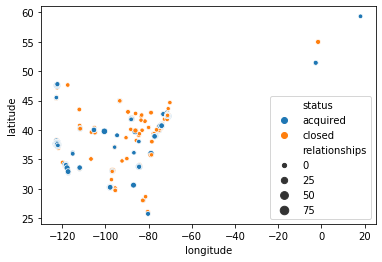

In [24]:
sns.scatterplot(
    data=startup, 
    x="longitude", 
    y="latitude", 
    size="relationships", 
    hue="status")

## Univariate analysis

### Continuous data

In [25]:
sns.set(rc={"figure.figsize":(15, 8)})

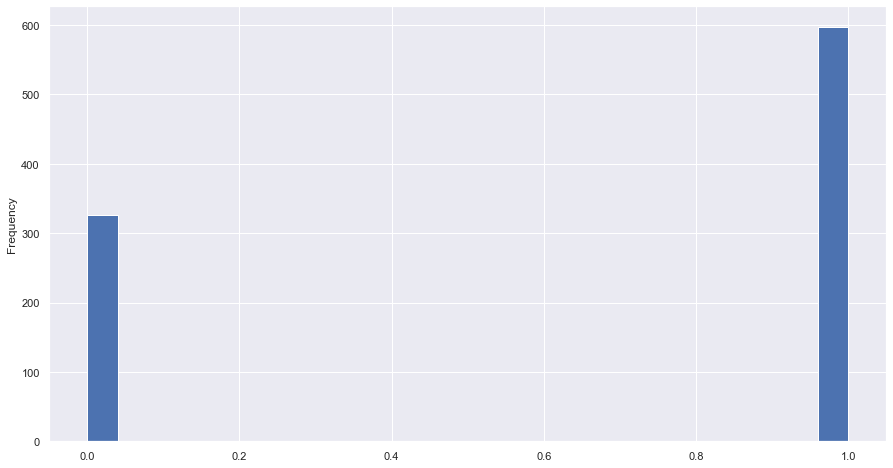

In [26]:
startup["labels"].plot(kind="hist", bins=25);

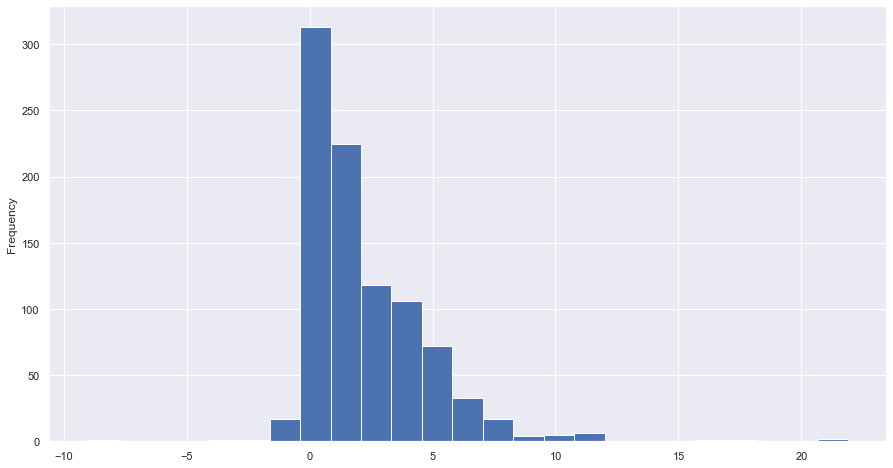

In [27]:
startup["age_first_funding_year"].plot.hist(bins=25);

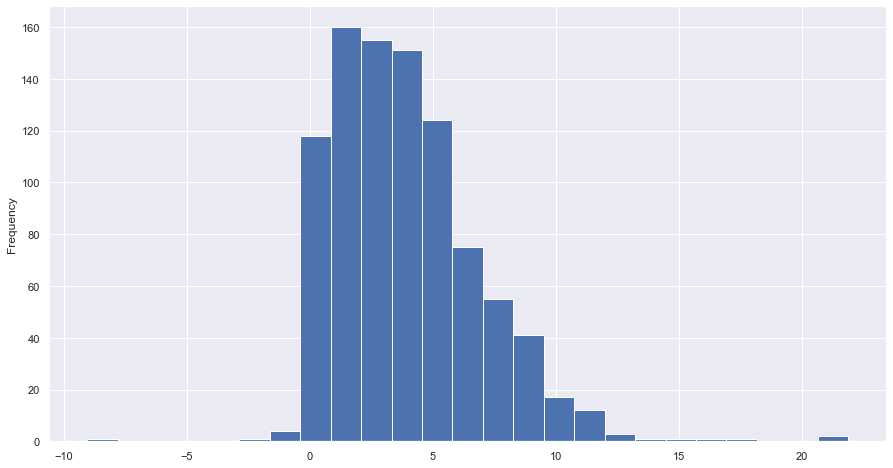

In [28]:
startup["age_last_funding_year"].plot.hist(bins=25);

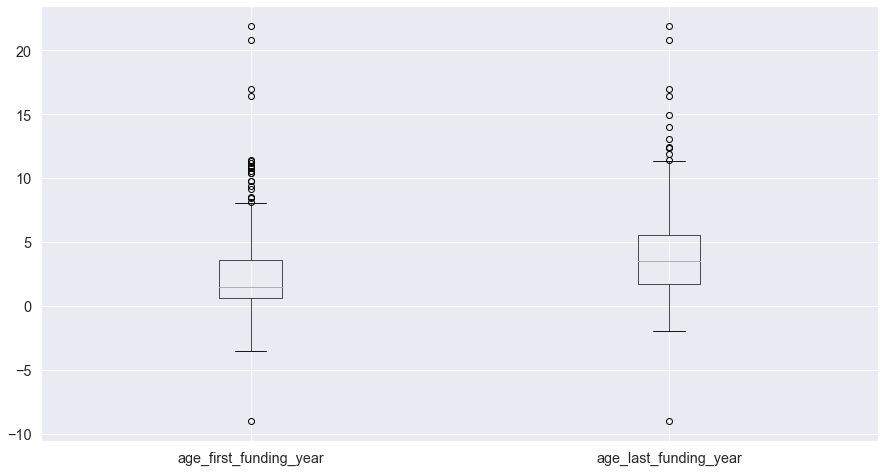

In [29]:
startup.boxplot(column=["age_first_funding_year", "age_last_funding_year"], fontsize="large");

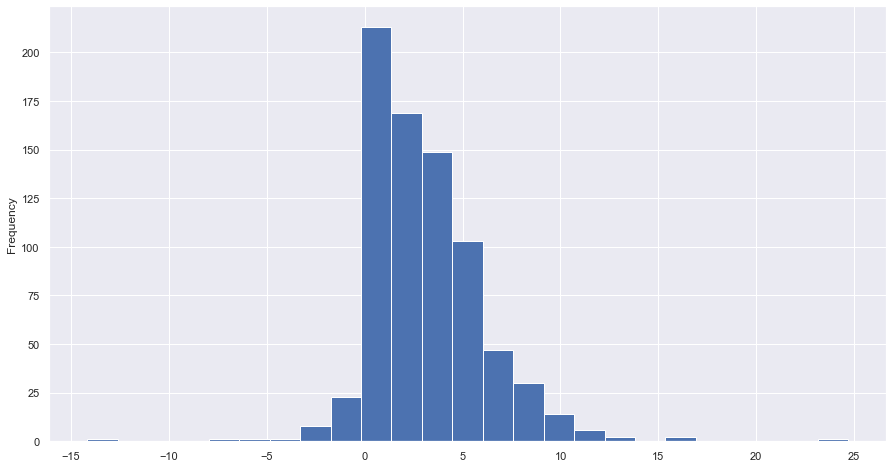

In [30]:
startup.age_first_milestone_year.plot.hist(bins=25);

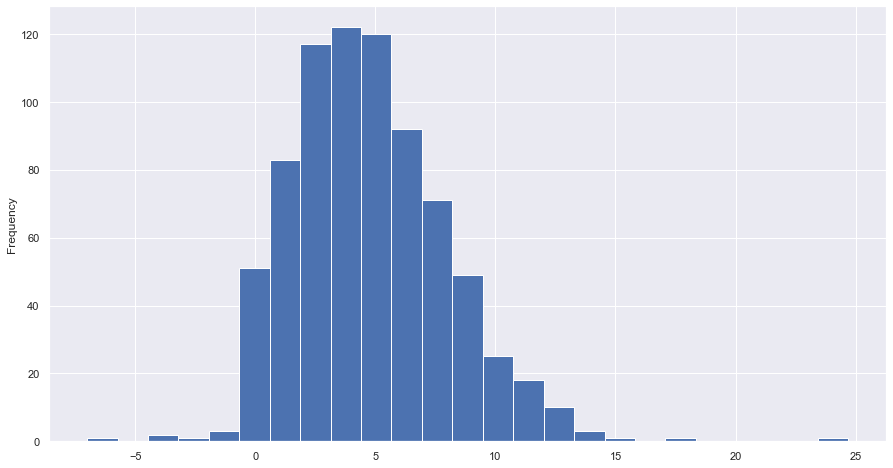

In [31]:
startup.age_last_milestone_year.plot.hist(bins=25);

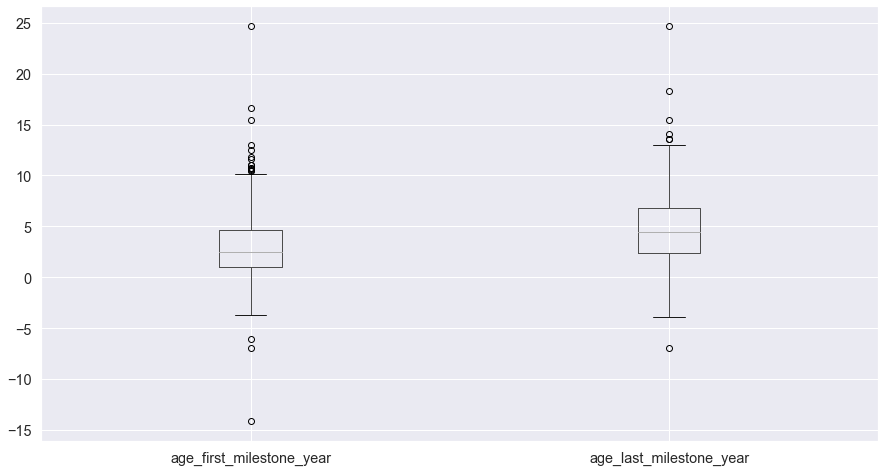

In [32]:
startup.boxplot(column=["age_first_milestone_year", "age_last_milestone_year"], fontsize="large");

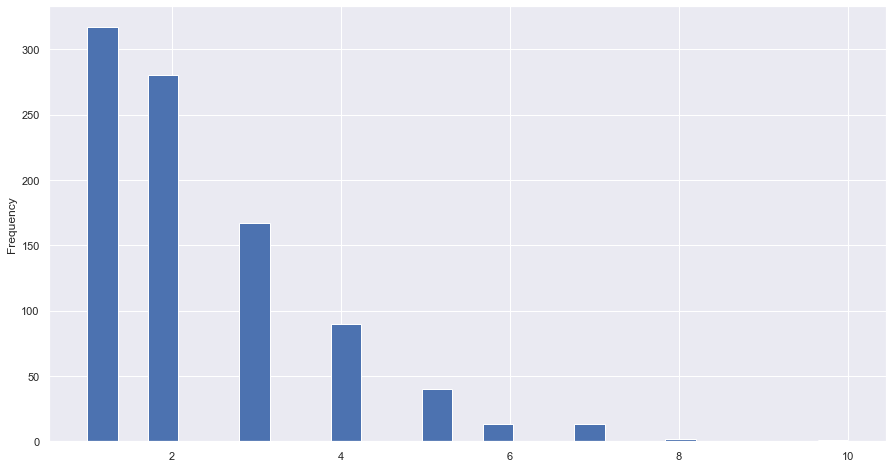

In [33]:
startup.funding_rounds.plot.hist(bins=25,);

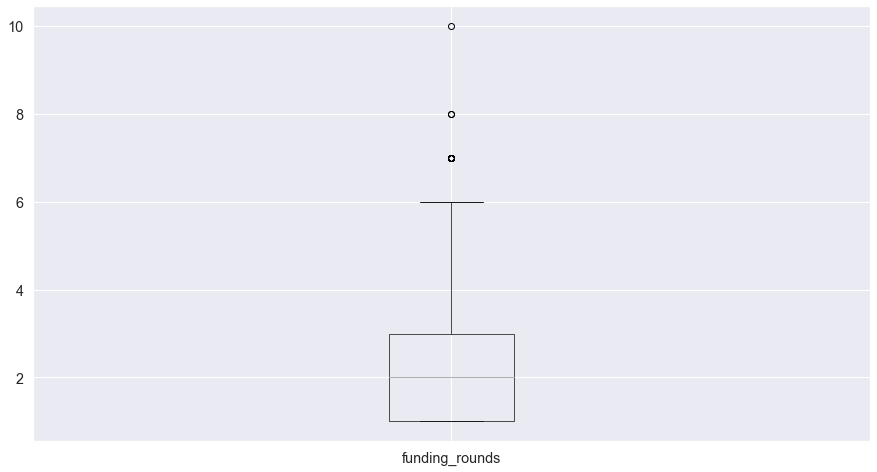

In [34]:
startup.boxplot(column="funding_rounds", fontsize="large");

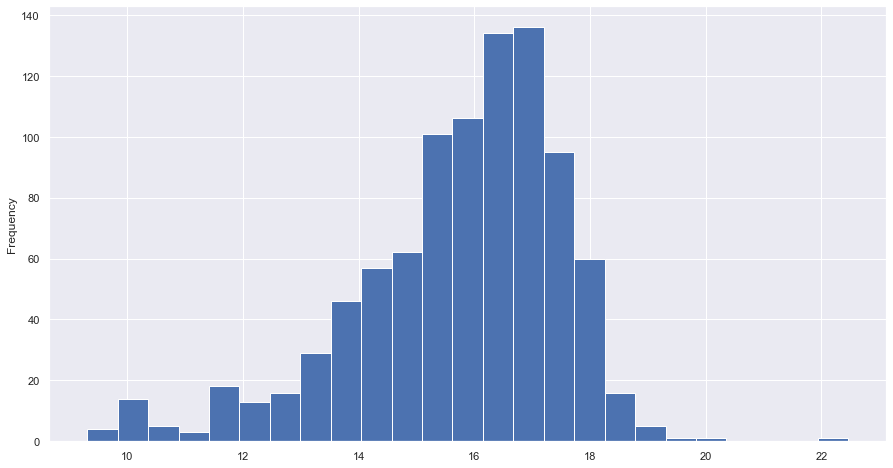

In [35]:
np.log(startup.funding_total_usd).plot.hist(bins=25);

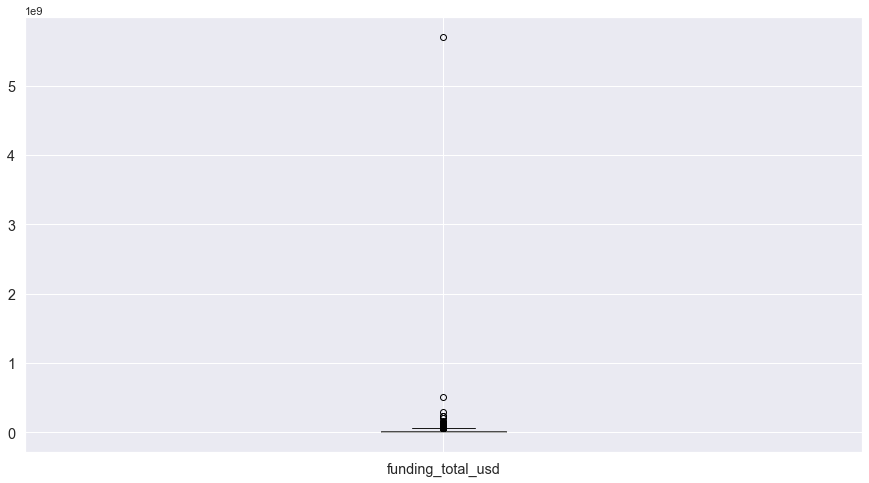

In [36]:
startup.boxplot(column="funding_total_usd", fontsize="large");

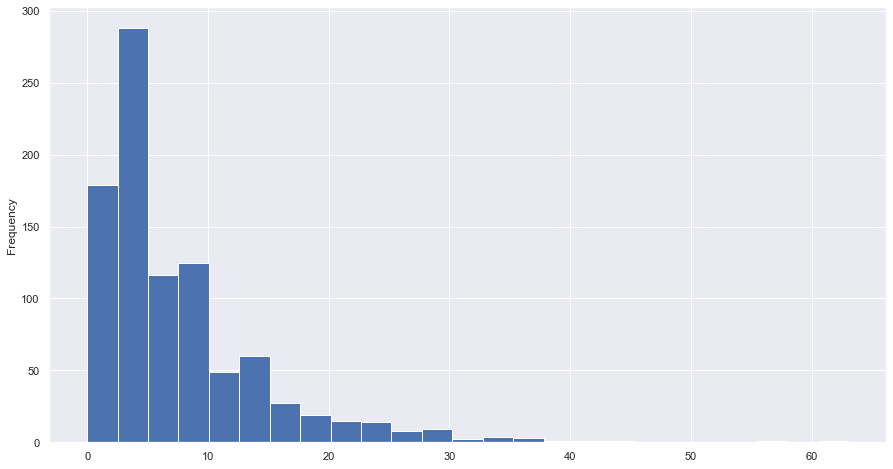

In [37]:
startup.relationships.plot.hist(bins=25);

### Categorical data

In [38]:
(startup["state_code"] == startup["state_code.1"]).sum()

922

In [39]:
startup["state_code.1"].isna().sum()

1

In [40]:
startup.drop("state_code.1", inplace=True, axis=1)
len(startup.columns)

46

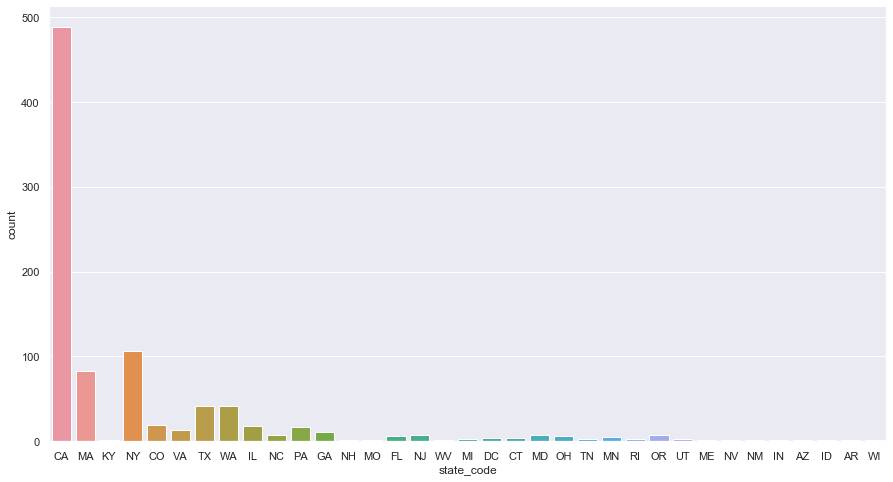

In [41]:
sns.countplot(x="state_code", data=startup)

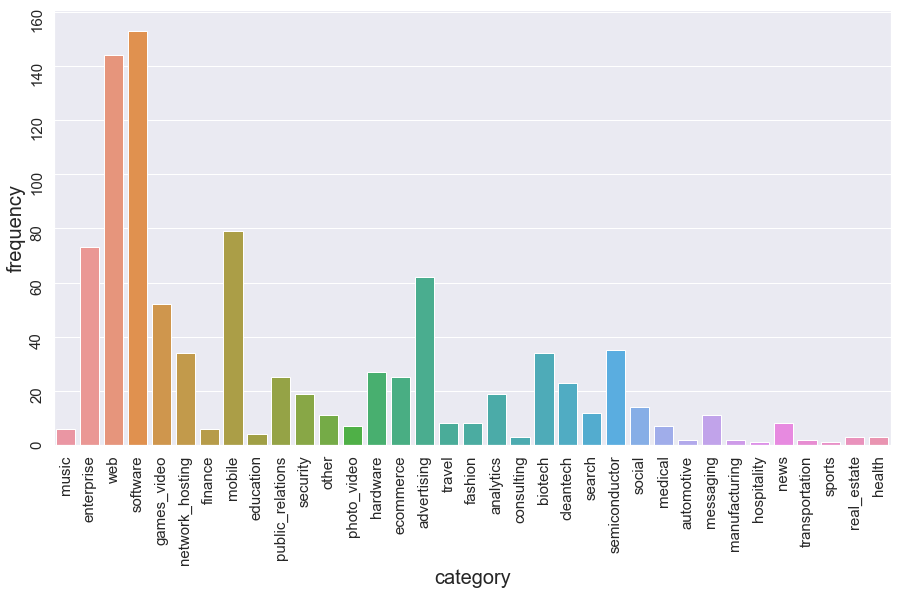

In [42]:
sns.countplot(data=startup, x="category_code")

plt.xlabel(xlabel="category", fontsize=20)
plt.ylabel(ylabel="frequency", fontsize=20)
plt.tick_params(labelsize=15, labelrotation=90)